**Q-1. 
Imagine you have a dataset where you have different Instagram features like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features.
Now you have to build a model which can predict the number of likes and Time Since posted.
Dataset - This is the Dataset(https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach) You can use this dataset for this question.**


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [4]:
df = pd.read_csv('instagram_reach.csv') 

In [5]:
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22
9,9,10,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7 hours,18


## Basic Info 

In [6]:
df.shape

(100, 8)

In [7]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [9]:
for i in df.columns: 
    print(f'No. of unique values in {i} : {len(df[i].value_counts())}')

No. of unique values in Unnamed: 0 : 27
No. of unique values in S.No : 30
No. of unique values in USERNAME : 95
No. of unique values in Caption : 94
No. of unique values in Followers : 94
No. of unique values in Hashtags : 98
No. of unique values in Time since posted : 11
No. of unique values in Likes : 55


In [10]:
df['Time since posted'] = df['Time since posted'].apply(lambda z : z.split(" ")[0])

In [11]:
df['Time since posted'] = df['Time since posted'].astype(int)

In [12]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


<AxesSubplot:xlabel='Time since posted', ylabel='Likes'>

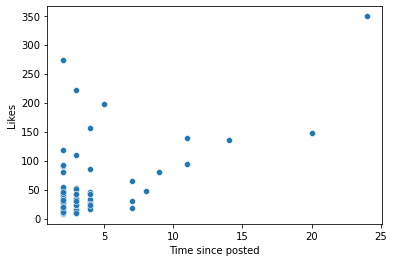

In [13]:
sns.scatterplot(df['Time since posted'], df['Likes'])

In [14]:
df.corr()

,Unnamed: 0,S.No,Followers,Time since posted,Likes
Unnamed: 0,1.000000,0.869163,0.208473,0.017372,0.010271
S.No,0.869163,1.000000,0.172002,-0.110024,0.009721
Followers,0.208473,0.172002,1.000000,0.251154,0.266218
Time since posted,0.017372,-0.110024,0.251154,1.000000,0.609888
Likes,0.010271,0.009721,0.266218,0.609888,1.000000


In [15]:
df['Followers'].min()

11

In [16]:
df.drop(labels = ['Unnamed: 0', 'S.No', 'USERNAME', 'Time since posted'], axis = 1, inplace = True)

In [17]:
df.head()

,Caption,Followers,Hashtags,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30


In [18]:
df.isnull().sum()

Caption      6
Followers    0
Hashtags     0
Likes        0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Caption    94 non-null     object
 1   Followers  100 non-null    int64 
 2   Hashtags   100 non-null    object
 3   Likes      100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [20]:
df.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


<AxesSubplot:xlabel='Likes', ylabel='Count'>

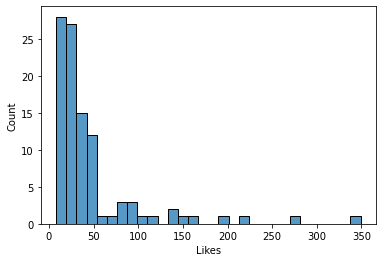

In [21]:
sns.histplot(df['Likes'])

<AxesSubplot:xlabel='Followers', ylabel='Count'>

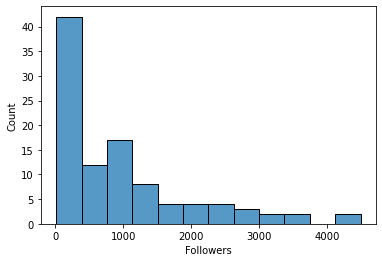

In [22]:
sns.histplot(df['Followers'])

<AxesSubplot:xlabel='Likes', ylabel='Followers'>

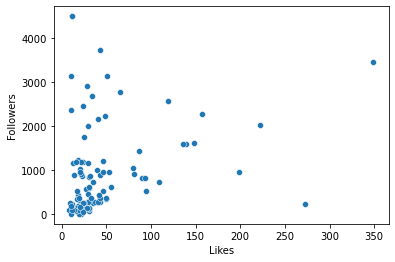

In [23]:
sns.scatterplot(data = df, x = 'Likes', y = 'Followers')

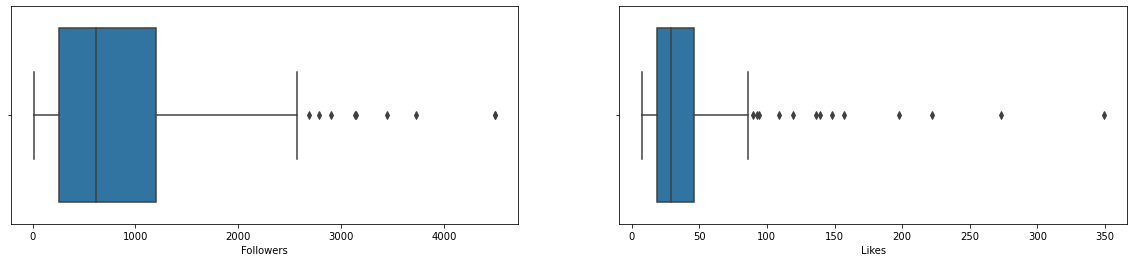

In [24]:
nf = ['Followers', 'Likes']

fig, axes = plt.subplots(1,2, figsize = (20,4))


for i in range(len(nf)): 
    sns.boxplot(df[nf[i]], ax = axes[i] )

**Observation :**  

- This data contains 100 instances. The data contains numerical and textual data. From the histrogram plots, it is observed that the numerical features are not distributed normally. The aim of this analysis is to predict 'Likes' from the input feature 'Followers', 'Caption' and 'Hashtags'. 


- 'Followers' and 'Likes' have somewhat positive correlation, but is not very significant/strong. 


- Also, it can be seen that we have outliers in our data. 

## Analysis Strategy : 

- First and foremost we need to transform the text data to vectors to perform a regression analysis. It is observed that we have long texts in 'Caption'. In 'Hashtags' we can assume that the hashtags actually contains important informations. So, throught out the textual analysis, we will consider 'Hashtags' data. 

- As we have non-normal data, we need to transform it to perform  regression analysis. 

- We also observe that the data set is small (only 100 instances). So, we need to check that whether we should remove the outliers and then build a model or we use RobustScalar and then build a model. 


###  Remove outliers : 

Followers    944.25
Likes         27.00
dtype: float64
-----------------------
(79, 4)
------------------------


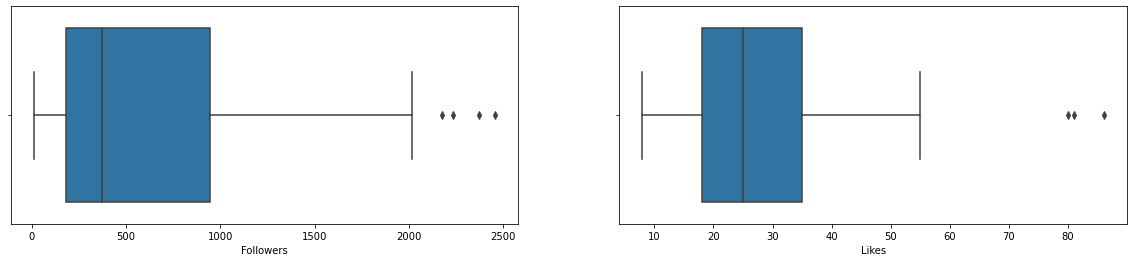

In [25]:
df2 = df.copy()
#l_feat = df2.columns

# putting limits 
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print('-----------------------')
# removing outliers
df2_out = df2[~((df2 < (Q1 - 1.5 * IQR)) |
                (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2_out.shape)
print('------------------------')



#plotting : 
fig, axes = plt.subplots(1,2, figsize=(20,4))

for i in range (len(nf)):
    sns.boxplot(df2_out[nf[i]],  ax = axes[i])
    
plt.show()    


In [26]:
df2_out.head()

,Caption,Followers,Hashtags,Likes
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30
5,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,18


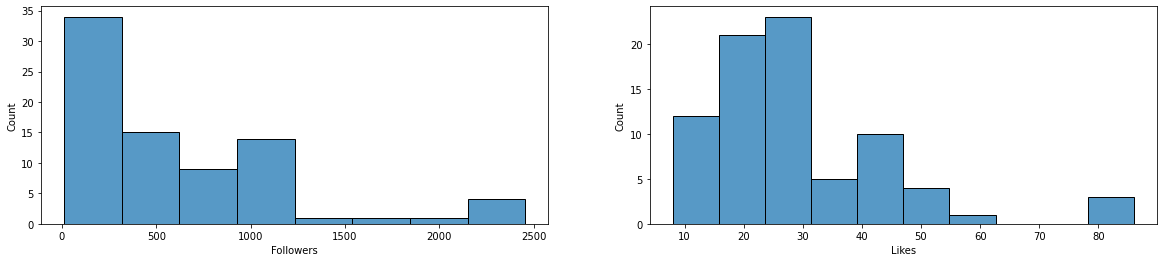

In [27]:
fig, axes = plt.subplots(1,2, figsize=(20,4))

for i in range(len(nf)) : 
    sns.histplot(df2_out[nf[i]], ax = axes[i])

#### A very preliminary analysis was done by just using the word vectors for the regression problem. It did not yeild anything fruitful. So, now, we will try to perform feature extraction from the textual data and see if that helps. (In this notebook this part is not shown, but one can try and find out.)




#### We will make a new dataframe with just likes, captions and hashtags. we will see if the length of caption, or hashtag topics or word_freq in caption or hashtags has anything to do with the number of likes.

In [28]:
df1 = df2_out.copy() ##  we take the data without outliers. 
#df1 = df.copy() # we take the data with outliers. 

In [29]:
df1.shape

(79, 4)

In [30]:
df1.dropna(inplace=True)

In [31]:
print(df1['Caption'][1])

We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing


#### If we observe keenly, it can be seen that the main challenge with this data is to find out the actual words/meaningful words from the hashtag data and the caption data. For example, in the above text, we have normal meaningful words (by meaningful words I mean the words for which we can find the meaning in dictionary). Along with that we have some words like  `#computerevolution`, `#computersciencetosciencefiction`, `#tomorrowstechnology` and many more. This data contains many more examples like that. 


#### The 'Caption' and 'Hashtags' columns need to clean and then the first task is to break this words into meaningful words before vectorizing the text. For splitting/breaking the compund words/lengthy words this we will use `wordninja` library.


## Cleaning text and Vectorization

In [32]:
import wordninja

In [33]:
def cleaning_process(text1) :
    text = text1
    #print(text)
    if type(text) == str : 
        text = re.sub(r"http\S+", "", text) # removing url
        
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
        #print(emoji_pattern.sub(r'', text)) # no emoji
        text = emoji_pattern.sub(r'', text)
        
        nopunc = [char for char in text if char not in string.punctuation] # removing punctuation
        text = ''.join(nopunc)
        
        text = ''.join([i for i in text if not i.isdigit()]) # removing digits
        
        text = text.lower()
        
        tokens = nltk.word_tokenize(text)
        tokens = [w for w in tokens if w not in stopwords.words('english')]
        #tokens = nltk.word_tokenize(text)
        
        #lematizer = WordNetLemmatizer()
        #ps = PorterStemmer()
        #lem_text = [lematizer.lemmatize(i) for i in tokens]
        #stem_text = [ps.stem(i) for i in lem_text]
        text = ' '.join(tokens)
                
        return text
    
    return None

In [34]:
df1['cleaned_caption'] = df1['Caption'].apply(cleaning_process)

In [35]:
df1['cleaned_hastags'] = df1['Hashtags'].apply(cleaning_process)

In [36]:
df1.head()

,Caption,Followers,Hashtags,Likes,cleaned_caption,cleaned_hastags
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,know ’ going workresponsibly postpone date act...,deck mac macintoshsayhello apple stevejobs ai ...
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,alexander barinov years cfo multinationals yea...,whoiswho aitrading ai aitradingteaminstateam i...
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,sfad,iot creworkplace cdo bigdata technologytech wo...
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,ever missed call phone charging system notify ...,instamachinelearning instabigdatainstamarketin...
5,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,18,cyber attacks frequent every day affect busine...,edtech learningeducationtechnology tech learnn...


In [37]:
df1['cleaned_caption'] = df1['cleaned_caption'].apply(lambda x : ' '.join(wordninja.split(x)))

In [38]:
df1['cleaned_hastags'] = df1['cleaned_hastags'].apply(lambda x : ' '.join(wordninja.split(x)))

In [39]:
df1.head()

,Caption,Followers,Hashtags,Likes,cleaned_caption,cleaned_hastags
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,know going work responsibly postpone date actu...,deck mac macintosh say hello apple steve jobs ...
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,alexander bari nov years cf o multinationals y...,who is who a i trading a i a i trading team in...
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,s fad,i ot c re workplace cdo big data technology te...
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,ever missed call phone charging system notify ...,insta machine learning insta big data insta ma...
5,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,18,cyber attacks frequent every day affect busine...,ed tech learning education technology tech lea...


In [40]:
X1 = df1['cleaned_hastags']

In [41]:
tfidf = TfidfVectorizer(lowercase=False)
#tfidf = CountVectorizer()
text_vect = tfidf.fit_transform(X1)

In [42]:
#tfidf.vocabulary_

In [43]:
#list(tfidf.vocabulary_.values())[:10]

In [44]:
#print(sorted(tfidf.vocabulary_, key = lambda x : (x[0]), reverse = True))

In [45]:
# finding weightage of words : 

#print('\nidf values:')
#for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
#    print(ele1, ':', ele2)

In [46]:
#len(tfidf.idf_)

len(tfidf.vocabulary_)

877

In [47]:
(tfidf.vocabulary_)

{'deck': 187,
 'mac': 497,
 'macintosh': 502,
 'say': 683,
 'hello': 366,
 'apple': 28,
 'steve': 733,
 'jobs': 442,
 'evolution': 263,
 'artificial': 33,
 'intelligence': 417,
 'machine': 499,
 'learning': 462,
 'terminator': 766,
 'ill': 399,
 'be': 58,
 'back': 47,
 'technology': 764,
 'computer': 145,
 'science': 685,
 'fiction': 282,
 'to': 776,
 'tomorrows': 779,
 'vr': 829,
 'ar': 29,
 'robot': 670,
 'robots': 672,
 'business': 95,
 'slides': 710,
 'illustration': 400,
 'sketches': 706,
 'drawing': 221,
 'who': 847,
 'is': 431,
 'trading': 788,
 'team': 761,
 'in': 405,
 'state': 731,
 'am': 13,
 'insta': 416,
 'people': 603,
 'crypto': 165,
 'currency': 169,
 'block': 79,
 'chain': 115,
 'for': 300,
 'ex': 264,
 'fiat': 281,
 'money': 546,
 'coins': 134,
 'user': 811,
 'experience': 267,
 'big': 67,
 'data': 181,
 'marketing': 513,
 'deep': 188,
 'industry': 409,
 'ml': 541,
 'ot': 588,
 're': 650,
 'workplace': 859,
 'cdo': 110,
 'tech': 762,
 'work': 857,
 'software': 718,
 '

In [48]:
len(tfidf.get_feature_names())

877

In [49]:
#tfidf.vocabulary_['youtube']

In [50]:
words_idf_dict = dict()
words_list = tfidf.get_feature_names()
idf_list = tfidf.idf_
words_idf_dict = {words_list[i]:idf_list[i] for i in range(len(words_list))}        

In [51]:
#words_idf_dict

#### As we can see that we have idf score for each and every word. The idea is to exploit this fact and find how 'Likes' are given for the text data, i.e. which kind of text gets more likes and otherwise. To do this we will find the  mean idf score for each instance and find that if there is any relation with this with the number of 'Likes'. 

In [52]:
def get_idf_scores(text) : 
    #print(text)
    t2 = nltk.word_tokenize(text)
    #print(t2)
    #t2 = [w.lower() for w in t2]
    #t2 = [w for w in t2 if not w in stopwords.words('english')]

    
    #lematizer = WordNetLemmatizer()
    #ps = PorterStemmer()
    #t2 = [lematizer.lemmatize(i) for i in t2]
    #stem_text = [ps.stem(i) for i in lem_text]
    #text = ' '.join(lem_text)
                
    
    
    
    #idf_list = [words_idf_dict[w.lower()] for w in t2]
    idf_list = [words_idf_dict[w] for w in t2 if len(w) > 1]
    avg_idf = np.mean(idf_list)
    #avg_idf = sorted(idf_list, reverse = True)[:3]
    return avg_idf



In [53]:
#t1 = df1['cleaned_hastags'][1]
#print(t1)

In [54]:
#print(df1['cleaned_caption'][0])

In [55]:
df1['avg_idf'] = df1['cleaned_hastags'].apply(get_idf_scores)

In [56]:
df1.head()

,Caption,Followers,Hashtags,Likes,cleaned_caption,cleaned_hastags,avg_idf
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,know going work responsibly postpone date actu...,deck mac macintosh say hello apple steve jobs ...,3.771254
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,alexander bari nov years cf o multinationals y...,who is who a i trading a i a i trading team in...,3.055729
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,s fad,i ot c re workplace cdo big data technology te...,3.428281
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,ever missed call phone charging system notify ...,insta machine learning insta big data insta ma...,2.958244
5,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,18,cyber attacks frequent every day affect busine...,ed tech learning education technology tech lea...,3.336452


#### Creating new variables which includes the length of Caption and Hashtags and sentiment polarity

In [57]:
df1['length_hashtags'] = df1['Hashtags'].apply(lambda x : x.count('#')) # no of topics

In [58]:
df1['length_caption'] = df1['cleaned_caption'].apply(lambda x : len(x.split(" "))) # no of words

In [59]:
# text polarity 

In [60]:
from textblob import TextBlob

In [61]:
df1['text_polarity'] = df1['cleaned_caption'].apply(lambda x : TextBlob(x).sentiment[0])

In [62]:
df1['text_subjectivity'] = df1['cleaned_caption'].apply(lambda x : TextBlob(x).sentiment[1])

In [63]:
df1.head()

,Caption,Followers,Hashtags,Likes,cleaned_caption,cleaned_hastags,avg_idf,length_hashtags,length_caption,text_polarity,text_subjectivity
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,know going work responsibly postpone date actu...,deck mac macintosh say hello apple steve jobs ...,3.771254,28,54,-0.180000,0.530000
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,alexander bari nov years cf o multinationals y...,who is who a i trading a i a i trading team in...,3.055729,30,97,-0.111111,0.318519
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,s fad,i ot c re workplace cdo big data technology te...,3.428281,30,2,0.000000,0.000000
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,ever missed call phone charging system notify ...,insta machine learning insta big data insta ma...,2.958244,26,32,0.333333,0.508333
5,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,18,cyber attacks frequent every day affect busine...,ed tech learning education technology tech lea...,3.336452,25,29,0.100000,0.380952


In [64]:
df1 = df1[['Caption', 'Followers', 'Hashtags',  'cleaned_caption', 'cleaned_hastags', 
                 'avg_idf', 'length_hashtags', 'length_caption', 'text_polarity', 'text_subjectivity', 'Likes']]

In [65]:
df1.head()

,Caption,Followers,Hashtags,cleaned_caption,cleaned_hastags,avg_idf,length_hashtags,length_caption,text_polarity,text_subjectivity,Likes
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,know going work responsibly postpone date actu...,deck mac macintosh say hello apple steve jobs ...,3.771254,28,54,-0.180000,0.530000,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,alexander bari nov years cf o multinationals y...,who is who a i trading a i a i trading team in...,3.055729,30,97,-0.111111,0.318519,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,s fad,i ot c re workplace cdo big data technology te...,3.428281,30,2,0.000000,0.000000,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,ever missed call phone charging system notify ...,insta machine learning insta big data insta ma...,2.958244,26,32,0.333333,0.508333,30
5,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,cyber attacks frequent every day affect busine...,ed tech learning education technology tech lea...,3.336452,25,29,0.100000,0.380952,18


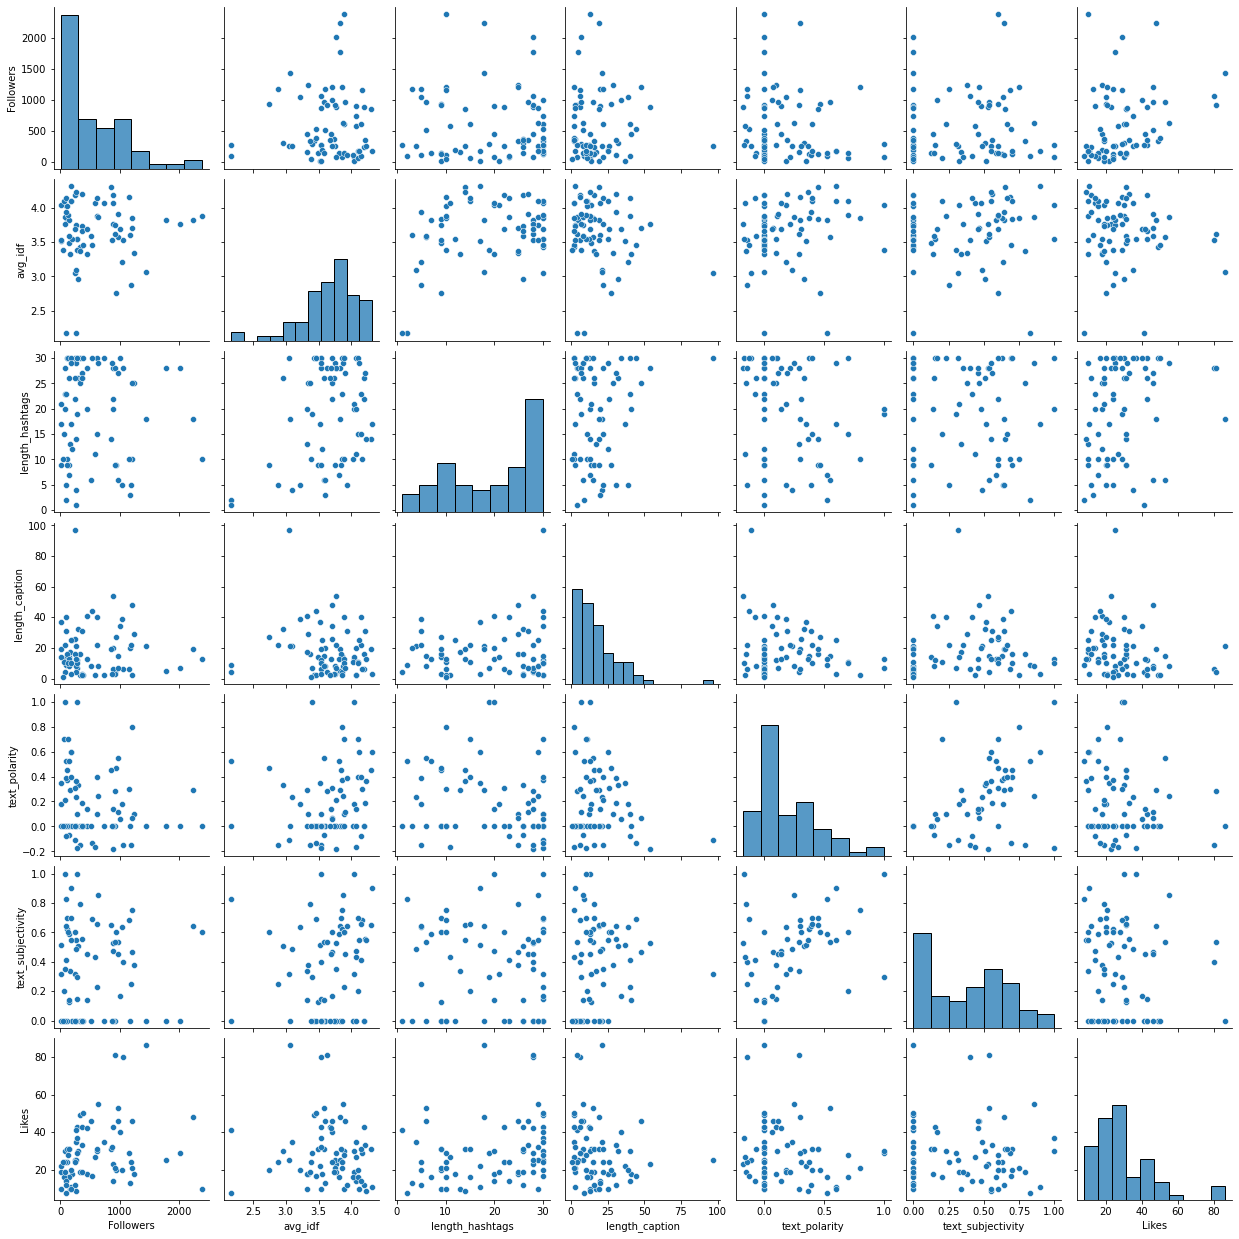

In [66]:
sns.pairplot(df1)

In [67]:
df1.corr()

,Followers,avg_idf,length_hashtags,length_caption,text_polarity,text_subjectivity,Likes
Followers,1.000000,0.010806,-0.023751,-0.018275,-0.188647,-0.024688,0.288021
avg_idf,0.010806,1.000000,0.283588,-0.160586,0.158444,0.123612,-0.131310
length_hashtags,-0.023751,0.283588,1.000000,0.105601,-0.197835,-0.047090,0.261602
length_caption,-0.018275,-0.160586,0.105601,1.000000,-0.134390,0.171163,-0.185302
text_polarity,-0.188647,0.158444,-0.197835,-0.134390,1.000000,0.514247,-0.149314
text_subjectivity,-0.024688,0.123612,-0.047090,0.171163,0.514247,1.000000,-0.105580
Likes,0.288021,-0.131310,0.261602,-0.185302,-0.149314,-0.105580,1.000000


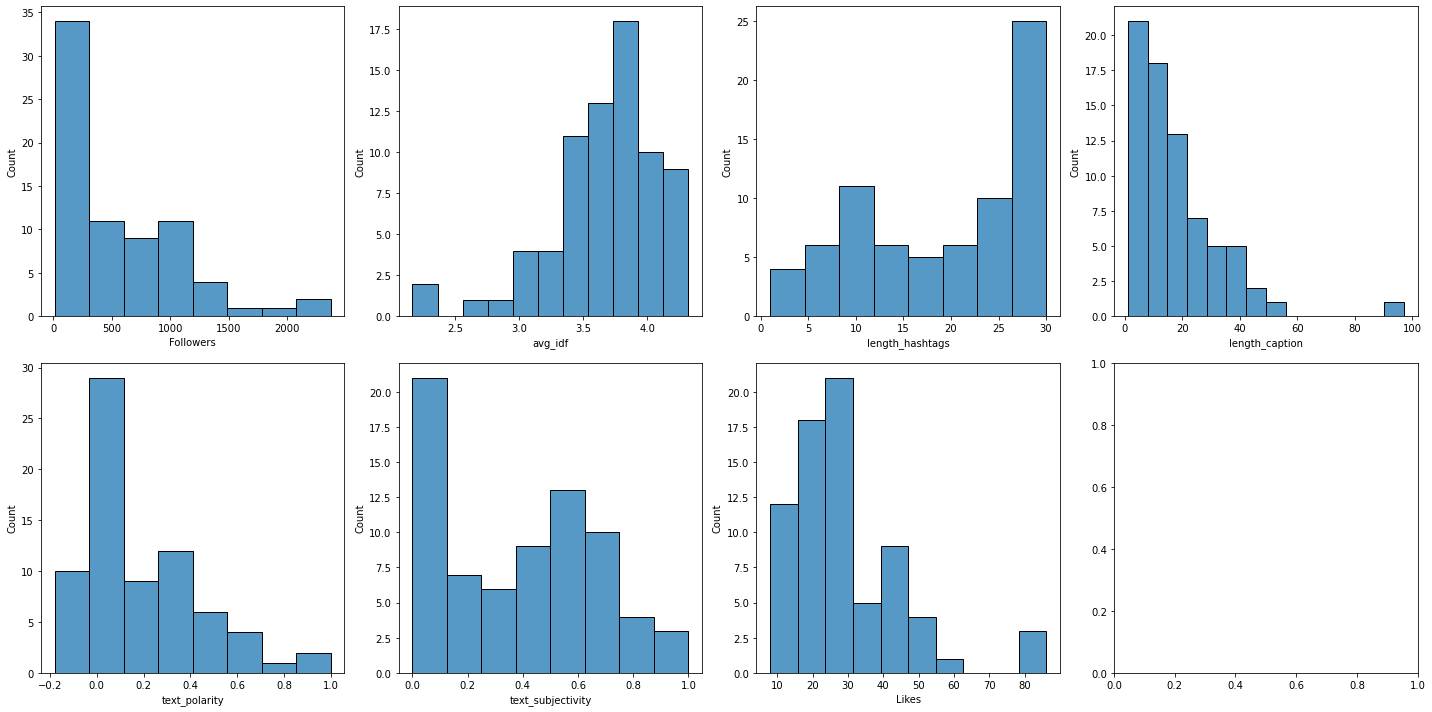

In [68]:
feat = ['Followers', 'avg_idf', 'length_hashtags', 'length_caption',
        'text_polarity', 'text_subjectivity', 'Likes']




fig, axes = plt.subplots(2,4, figsize=(20,10), tight_layout = True)
s1 = [[0,0], [0,1], [0,2], [0,3],
      [1,0], [1,1], [1,2], [1,3]]

for i in range(len(feat)) : 
    j = s1[i][0]
    k = s1[i][1]
    sns.histplot(df1[feat[i]], ax = axes[j,k])
    
plt.show()

**From the above plots it can be seen that the distributions of the features are not proper gaussian. So, we need to take care of this while building a regression model. As these are non-normal distributions, we have to transform them. For this case we will use log transformation. We will refrain from transforming the 'text_polarity' and 'text_subjectivity' as they have negative values too and the '-' sign actually helps to find the correlation between the text and the number of likes.** 

In [69]:
df3 = df1[['Followers', 'avg_idf', 'length_hashtags', 'length_caption',
       'text_polarity', 'text_subjectivity', 'Likes']]

In [70]:
df3.head()

,Followers,avg_idf,length_hashtags,length_caption,text_polarity,text_subjectivity,Likes
1,880,3.771254,28,54,-0.180000,0.530000,23
2,255,3.055729,30,97,-0.111111,0.318519,25
3,340,3.428281,30,2,0.000000,0.000000,49
4,304,2.958244,26,32,0.333333,0.508333,30
5,1231,3.336452,25,29,0.100000,0.380952,18


### Log Transformation 

In [71]:
df3['Followers'] = np.log(df3['Followers'])

In [72]:
df3['Likes'] = np.log(df3['Likes'])

In [73]:
df3['length_caption'] = np.log(df3['length_caption'])

In [74]:
df3['length_hashtags'] = np.log(df3['length_hashtags'])

In [75]:
df3['avg_idf'] = np.log(df3['avg_idf'])

In [76]:
df3.corr()

,Followers,avg_idf,length_hashtags,length_caption,text_polarity,text_subjectivity,Likes
Followers,1.000000,-0.015883,0.055687,-0.049163,-0.214285,-0.005466,0.376391
avg_idf,-0.015883,1.000000,0.499921,-0.077388,0.128959,0.099876,-0.069602
length_hashtags,0.055687,0.499921,1.000000,0.013202,-0.126519,-0.012861,0.249534
length_caption,-0.049163,-0.077388,0.013202,1.000000,0.019488,0.293076,-0.234204
text_polarity,-0.214285,0.128959,-0.126519,0.019488,1.000000,0.514247,-0.159149
text_subjectivity,-0.005466,0.099876,-0.012861,0.293076,0.514247,1.000000,-0.127243
Likes,0.376391,-0.069602,0.249534,-0.234204,-0.159149,-0.127243,1.000000


It can be seen that 'Likes' is somewhat positively correlated to 'Followers', 'length_hashtags' and negatively correlated to the 'length_caption', 'text_polarity' and 'text_subjectivity'. 

In [77]:
df3.head()

,Followers,avg_idf,length_hashtags,length_caption,text_polarity,text_subjectivity,Likes
1,6.779922,1.327407,3.332205,3.988984,-0.180000,0.530000,3.135494
2,5.541264,1.117018,3.401197,4.574711,-0.111111,0.318519,3.218876
3,5.828946,1.232059,3.401197,0.693147,0.000000,0.000000,3.891820
4,5.717028,1.084596,3.258097,3.465736,0.333333,0.508333,3.401197
5,7.115582,1.204908,3.218876,3.367296,0.100000,0.380952,2.890372


## Model Building

In [78]:
X = df3.copy()
X.drop(labels = 'Likes', axis = 1, inplace=True)

In [79]:
y = df3['Likes']

In [80]:
X.head()

,Followers,avg_idf,length_hashtags,length_caption,text_polarity,text_subjectivity
1,6.779922,1.327407,3.332205,3.988984,-0.180000,0.530000
2,5.541264,1.117018,3.401197,4.574711,-0.111111,0.318519
3,5.828946,1.232059,3.401197,0.693147,0.000000,0.000000
4,5.717028,1.084596,3.258097,3.465736,0.333333,0.508333
5,7.115582,1.204908,3.218876,3.367296,0.100000,0.380952


In [81]:
y.head()

1    3.135494
2    3.218876
3    3.891820
4    3.401197
5    2.890372
Name: Likes, dtype: float64

In [82]:
X.shape

(73, 6)

In [83]:
y.shape

(73,)

In [84]:
numfeat = [item for item in X.columns if X[item].dtypes != 'O']

In [85]:
numfeat

['Followers',
 'avg_idf',
 'length_hashtags',
 'length_caption',
 'text_polarity',
 'text_subjectivity']

In [86]:
from sklearn.model_selection import  train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
print(f'Shape X train : {X_train.shape}, Shape y train : {y_train.shape}')
print(f'Shape X train : {X_test.shape}, Shape y train : {y_test.shape}')


Shape X train : (58, 6), Shape y train : (58,)
Shape X train : (15, 6), Shape y train : (15,)


In [89]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [90]:
"""
# model and pipeline

#pipeline 

num_pipeline = Pipeline(steps = [#('imputer', SimpleImputer(strategy='median')), 
                                 ('scaler', StandardScaler())
                                 ])
    

text_pipeline = Pipeline(steps= [#('imputer', SimpleImputer(strategy='most_frequent')), 
                                ('vectorizer', TfidfVectorizer(stop_words='english', analyzer='word')) 
                                #('scaler',StandardScaler())
                                ])

# preprocessor 

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numfeat[:-1])#, 
    #('text_pipeline', text_pipeline, textfeat)
])
"""



"\n# model and pipeline\n\n#pipeline \n\nnum_pipeline = Pipeline(steps = [#('imputer', SimpleImputer(strategy='median')), \n                                 ('scaler', StandardScaler())\n                                 ])\n    \n\ntext_pipeline = Pipeline(steps= [#('imputer', SimpleImputer(strategy='most_frequent')), \n                                ('vectorizer', TfidfVectorizer(stop_words='english', analyzer='word')) \n                                #('scaler',StandardScaler())\n                                ])\n\n# preprocessor \n\npreprocessor = ColumnTransformer([\n    ('num_pipeline', num_pipeline, numfeat[:-1])#, \n    #('text_pipeline', text_pipeline, textfeat)\n])\n"

In [91]:
X_train.head()

,Followers,avg_idf,length_hashtags,length_caption,text_polarity,text_subjectivity
29,5.631212,1.265491,3.401197,2.302585,-0.175000,1.000000
80,4.941642,1.359295,3.401197,2.302585,0.700000,0.600000
70,7.090077,1.350984,2.302585,0.693147,0.800000,0.750000
44,4.770685,1.393560,2.302585,2.397895,0.000000,0.000000
56,6.272877,1.240416,3.401197,3.784190,-0.132727,0.690909


In [92]:
#X_train_scaled = pd.DataFrame(preprocessor.fit_transform(X_train))
#X_test_scaled = pd.DataFrame(preprocessor.transform(X_test))

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [95]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [96]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso' : Lasso(), 
    'Ridge' : Ridge(),
    'KNeighborsRegression':KNeighborsRegressor(),
    'SVR':SVR(),
    'DecisionTree' : DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
}

trained_model_list=[]
model_list=[]
pred_list = list()
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, mse, rmse, r2_square=evaluate_model(np.exp(y_test),np.exp(y_pred))

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    pred_list.append(y_pred)
    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MSE", mse)
    print("MAE:",mae)
    print("R2 score",r2_square)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 17.661416759829358
MSE 311.9256419643814
MAE: 15.528575243298887
R2 score -0.41367420219122963


Lasso
Model Training Performance
RMSE: 15.253636160742646
MSE 232.67341612431565
MAE: 12.90673155618833
R2 score -0.05449620569574587


Ridge
Model Training Performance
RMSE: 17.471263042627537
MSE 305.24503230468287
MAE: 15.27530441985568
R2 score -0.38339709681653344


KNeighborsRegression
Model Training Performance
RMSE: 16.197060797696135
MSE 262.344778484265
MAE: 13.587230866083424
R2 score -0.18896940657776296


SVR
Model Training Performance
RMSE: 17.167295166036375
MSE 294.71602331781594
MAE: 15.055239004996416
R2 score -0.3356787101983758


DecisionTree
Model Training Performance
RMSE: 22.93323643390381
MSE 525.9333333333332
MAE: 17.26666666666667
R2 score -1.3835757160697728


RandomForestRegressor
Model Training Performance
RMSE: 17.79978519289669
MSE 316.8323529132642
MAE: 15.532416680106538
R2 score -0.4359118439649603




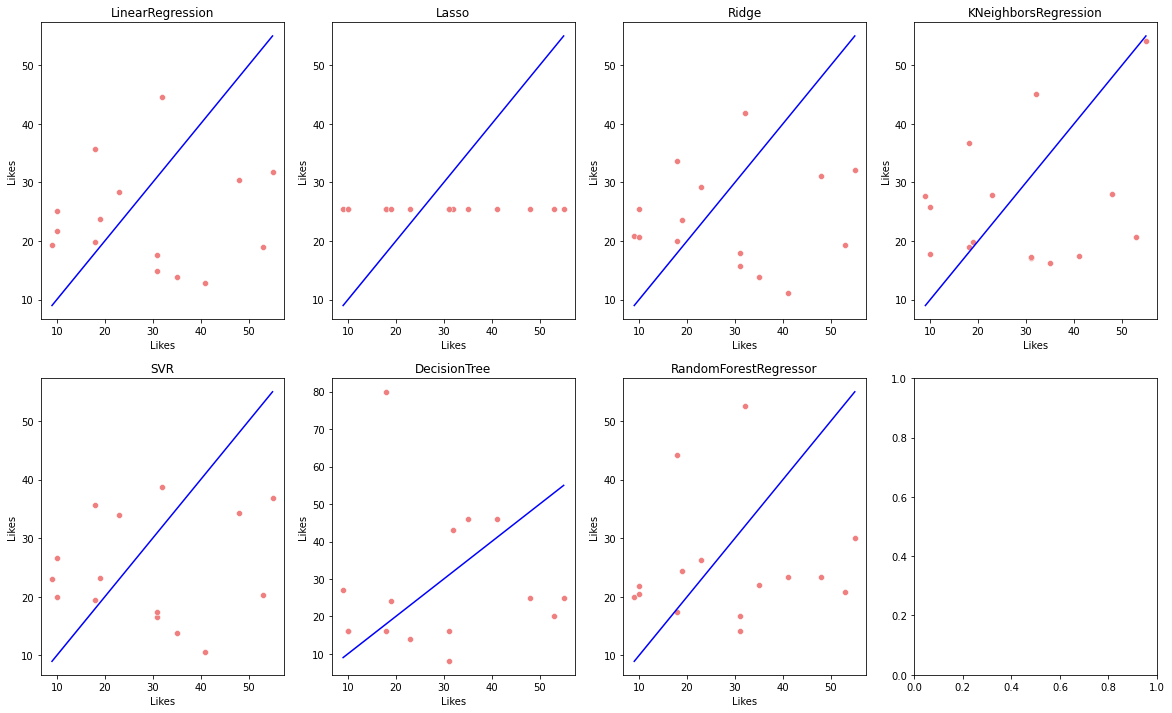

In [97]:
fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2],[1,3] ]

for items in range(0, len(model_list)): 
    i = si[items][0]
    j = si[items][1]
    sns.lineplot(np.exp(y_test), np.exp(y_test), color = 'blue', legend = True, ax=axes[i,j])
    sns.scatterplot(np.exp(y_test), np.exp(pred_list[items]), color = 'lightcoral', legend = True, ax=axes[i,j])
    axes[i,j].set_title(model_list[items])    
    #axes[i,j].set_xlabel('rom y test)')
    #axes[i,j].set_ylabel(f'FWI (from {lnames[items]})')
    #axes[i,j].legend(['y_test', lnames[items] ])
    
    
plt.show()

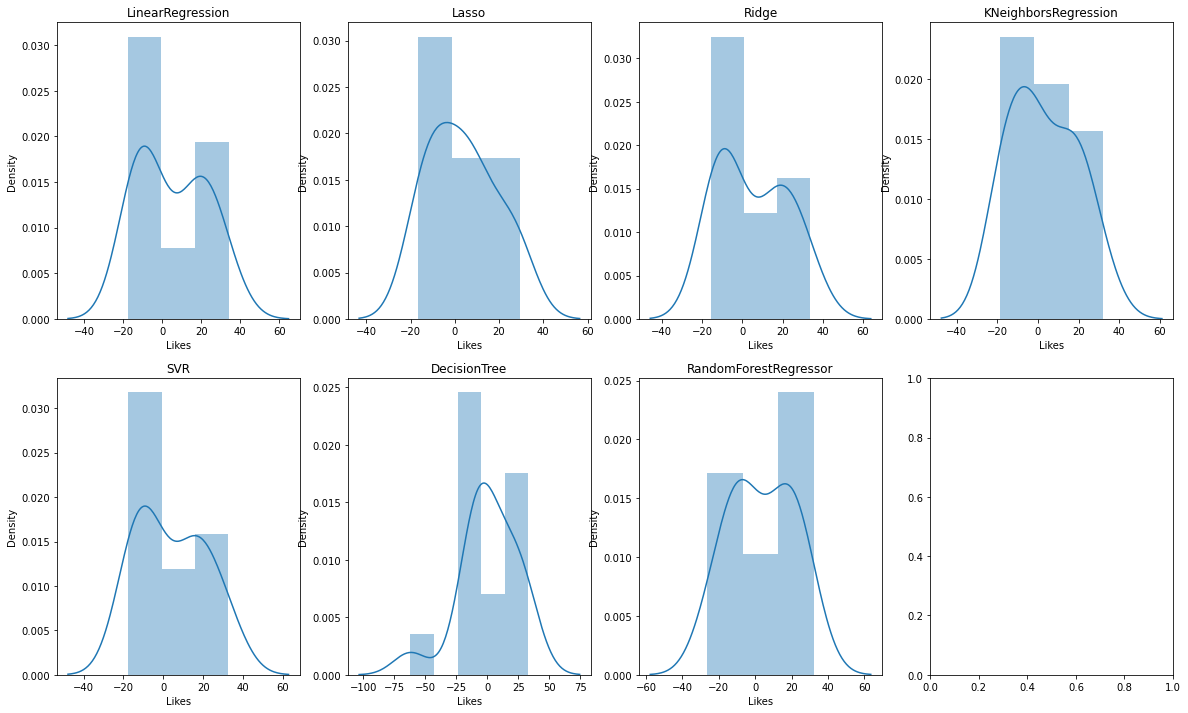

In [98]:
fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2],[1,3] ]

for items in range(0, len(model_list)): 
    i = si[items][0]
    j = si[items][1]
    #sns.lineplot(y_test, y_test, color = 'blue', legend = True, ax=axes[i,j])
    sns.distplot(np.exp(y_test) - np.exp(pred_list[items]), ax=axes[i,j])
    axes[i,j].set_title(model_list[items])    
    
plt.show()

## Comments and Discussions 

- As we have already done the log transformation, we are not transforming out data any more. 

- The analysis was done with and without outliers, and it is found that removing outliers decrease the metric values. 

- Ofcourse, the result does not seem very good, the metric values are high, $R^2$ has a negative value. But one need to also consider that the data set it very small and number of features are also small, which may lead to negative $R^2$ values.  

- Among all the models, KNN does better job. 

- While finding the residual, we have taken care of the inverse transformation. i.e. Initially the features were log transformed. After modelling while comparing, we have done inverse log transformation.  